In [6]:
import ast
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from os.path import join
from functions import drawMultipleSAandBB

In [2]:
DATASET_DIRECTORY = 'symmetry_database'

In [4]:
df = pd.read_csv(join(DATASET_DIRECTORY,'labels.csv'),index_col='index')
df

,fileName,numSymmetries,numDecoys,symmetries,Darkness,xPeriod,yPeriod,turbSize,offsetX,offsetY,backgroundType,turbPower
index,,,,,,,,,,,,
0,0.png,2,11,"[{'center': (127.3004729682885, 205.1989306610...",0.138993,2,1,4,-19,-27,1,1.722743
1,1.png,2,9,"[{'symAxes': [[[133.0763232452719, 81.08774565...",0.278408,3,6,32,-182,-178,1,0.279296
2,2.png,4,8,"[{'symAxes': [[[18.584020249406237, 66.3809465...",0.788164,0,3,8,-30,-27,1,2.178439


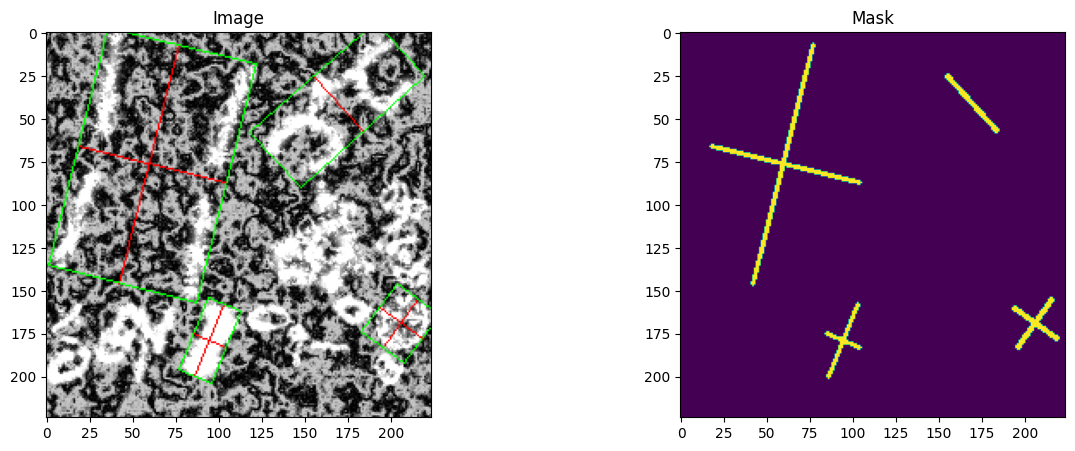

In [22]:
# Draws all symmetries in the row on the img
def drawRow(img, row):
    # Transforming list of dictionaries drom str to list
    symmetries = ast.literal_eval(row['symmetries'])
    # Looping through all symmetries in the image
    for symm in symmetries:
        drawMultipleSAandBB(img, symm['symAxes'], symm['center'], symm['width'], symm['height'], symm['finalRotation'])
    return img

# Returns a mask of the selected row
def getMask(row, path, thickness = 2):
    img = cv2.imread(join(path, row['fileName']))
    mask = np.zeros((img.shape[:2]), np.uint8)
    # Painting axis on mask
    symmetries = ast.literal_eval(row['symmetries'])
    # Looping through all symmetries in the image
    for symm in symmetries:
        for [startAxis,endAxis] in symm['symAxes']:
            cv2.line(mask, (int(startAxis[0]),int(startAxis[1])), (int(endAxis[0]),int(endAxis[1])), 255, thickness)
    return mask

row = df.iloc[2]
img = cv2.imread(join('symmetry_database', 'images', row['fileName']))
drawRow(img, row)
mask = getMask(row, join(DATASET_DIRECTORY, 'images'))

# Display
_, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].imshow(img), ax[0].set_title(f'Image')
ax[1].imshow(mask), ax[1].set_title(f'Mask')

plt.show()
        


In [21]:
for _,row in tqdm(df.iterrows(), total=len(df)):
    mask = getMask(row, join(DATASET_DIRECTORY, 'images'))
    cv2.imwrite(join(DATASET_DIRECTORY,'labels',f'mask_{row["fileName"]}'), mask)

100%|██████████| 3/3 [00:00<00:00, 250.00it/s]
